In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/preprocessed-dataset-sentiment-analysis/EcoPreprocessed.csv


# Sentiment Analysis Basic ML Model Building

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Preprocessed Review Data
- Creating independent varibale X
- Creating dependent variable y

In [3]:
df = pd.read_csv("/kaggle/input/preprocessed-dataset-sentiment-analysis/EcoPreprocessed.csv")
df.rename(columns={'division':'target'}, inplace=True)
df.reset_index(drop=True,inplace=True)
y = df['target'].replace({'positive':1, 'neutral':0, 'negative':-1})
X = df['review']


### Splitting X and y as 80% Train and 20% Test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

3223                                 really great product
927     everything good biggest problem alexa not get ...
3785    useless product not worth money pick song amaz...
1662    good product purchase but if smart appliances ...
3817                                          value muney
                              ...                        
835     dont want integrate anything house doesnt soun...
3264    recieved product less hours amazon price rs sa...
1653             good product not able connect wipro bulb
2607          nice voiceenjoy but without wifi didnt play
2732    not happy ok product not catch things fast add...
Name: review, Length: 3267, dtype: object

### Vectorization

In [5]:
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = HashingVectorizer(n_features=2**18)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

## Model Building

Fitting Multiple ML Models

In [6]:
#Creating a function for any moddels

def models(X_train, y_train):
    """
    A Function to make use of various ML algos
    """
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(class_weight='balanced', random_state=0)
    log.fit(X_train, y_train)
    
    #KNearestNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, y_train)
    
    #SVC LinearKernel
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    
    #SVC RBF Kernel
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=50, criterion='gini',random_state=0)
    forest.fit(X_train, y_train)
    
    #Print the training accuracy for each models
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]KN Neighbors Training Accuracy:', knn.score(X_train, y_train))
    print('[2]SVC Linear Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[4]Decision Tree Training Accuracy:', tree.score(X_train, y_train))
    print('[5]Random Forest Training Accuracy:', forest.score(X_train, y_train))
 
    
    
    return log, knn, svc_lin, svc_rbf, tree, forest

## Training Accuracy for various models

In [7]:
model  = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.8977655341291705
[1]KN Neighbors Training Accuracy: 0.835016835016835
[2]SVC Linear Training Accuracy: 0.9354147535965718
[3]SVC RBF Training Accuracy: 0.977961432506887
[4]Decision Tree Training Accuracy: 0.9987756351392715
[5]Random Forest Training Accuracy: 0.9987756351392715


### Random Forest
- Model with highest training Accuracy

In [8]:
from sklearn.metrics import accuracy_score
y_pred = model[5].predict(X_test)
accuracy_score(y_test, y_pred)

0.8347613219094248

## Confusion Matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


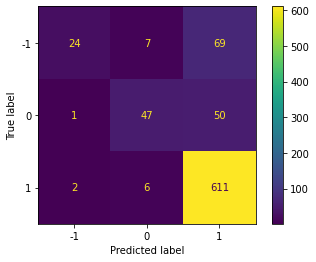

In [9]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
y_pred = model[5].predict(X_test)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model[5], X_test, y_test)
plt.show()

## Predicting From User Inputs - RFC

In [10]:
review = ['good produc']
review = vectorizer.transform(review)
predict = model[5].predict(review)

if predict == 1:
    print('Positive')
elif predict == 0:
    print('neutral')
else:
    print('negative')

Positive
